In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [52]:
df = pd.read_csv("ex2data1.txt", header=None, names=["x1", "x2", "y"])
df.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [53]:
X_train = df.iloc[:, :-1].values  # Kolom pertama dan kedua sebagai fitur
y_train = df.iloc[:, -1].values 

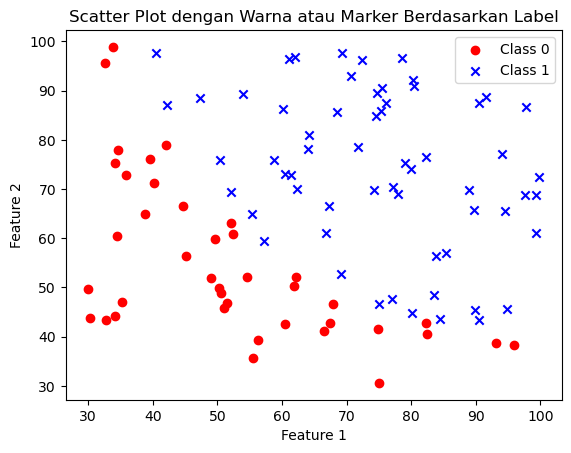

In [54]:
# Menentukan warna atau marker berdasarkan nilai y_train
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', label='Class 0', marker='o')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', label='Class 1', marker='x')

# Memberikan label dan judul
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot dengan Warna atau Marker Berdasarkan Label')

# Menampilkan legend
plt.legend()

### cost function

In [77]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [78]:
sigmoid(0)

0.5

In [79]:
print ("sigmoid([ -1, 0, 1, 2]) = " + str(sigmoid(np.array([-1, 0, 1, 2]))))

sigmoid([ -1, 0, 1, 2]) = [0.26894142 0.5        0.73105858 0.88079708]


In [80]:
def compute_cost(X,y,w,b):
    
    total_cost = 0
    m = X.shape[0]
    for i in range(m):
        prediction = np.dot(X[i],w)+b
        f_wb = sigmoid(prediction)
        loss = (-y[i]*(np.log(f_wb))-(1-y[i])*(np.log(1-f_wb)))
        total_cost +=loss
    total_cost/=(m)
    return total_cost

In [81]:
m, n = X_train.shape

# Compute and display cost with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

Cost at initial w and b (zeros): 0.693


In [82]:
# Compute and display cost with non-zero w and b
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w and b (non-zeros): {:.3f}'.format(cost))

Cost at test w and b (non-zeros): 0.218


In [83]:
def compute_gradient(X,y,w,b):
    dj_dw = np.zeros(w.shape)
    dj_db = 0
    m,n = X.shape

    for i in range(m):
        z = np.dot(X[i],w)+b
        f_wb = sigmoid(z)
        for j in range(n):
            dj_dw[j] += (f_wb - y[i]) * X[i][j]
        dj_db += (f_wb - y[i])
    dj_dw/=m
    dj_db/=m
    return dj_dw,dj_db

In [84]:
# Compute and display gradient with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.

dj_dw, dj_db = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}' )

dj_db at initial w and b (zeros):-0.1
dj_dw at initial w and b (zeros):[-12.00921658929115, -11.262842205513591]


In [85]:
# Compute and display cost and gradient with non-zero w and b
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_dw, dj_db  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test w and b:', dj_db)
print('dj_dw at test w and b:', dj_dw.tolist())

dj_db at test w and b: -0.5999999999991071
dj_dw at test w and b: [-44.831353617873795, -44.37384124953978]


In [90]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    w = w_in
    b = b_in

    history = []
    m,n = X.shape
    loss = 0
    for i in range(num_iters):
        dj_dw,dj_db = gradient_function(X, y, w,b)
        w = w - alpha * (dj_dw)
        b = b - alpha * (dj_db)

        loss = cost_function(X, y, w, b)
        history.append(loss)
        if i%1000==0:
            print(f"Iterasi {i}, Cost = {loss}")
    print(f"Final Loss : {loss}, parameter : {w},{b}")
    return w,b,history

In [91]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history, = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations)

Iterasi 0, Cost = 0.963790183213751
Iterasi 1000, Cost = 0.30509032658691543
Iterasi 2000, Cost = 0.30472280911605265
Iterasi 3000, Cost = 0.3043577091139877
Iterasi 4000, Cost = 0.30399500255077394
Iterasi 5000, Cost = 0.30363466571420084
Iterasi 6000, Cost = 0.3032766752046074
Iterasi 7000, Cost = 0.30292100792979143
Iterasi 8000, Cost = 0.3025676411000218
Iterasi 9000, Cost = 0.3022165522231424
Final Loss : 0.3018680668134607, parameter : [0.07125355 0.06482888],-8.188622906639248


### decision boundary

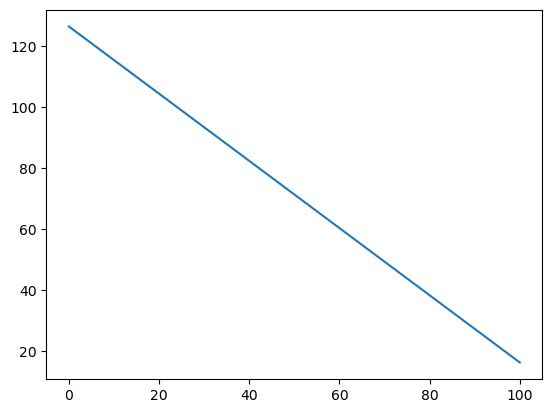

In [97]:
# Parameter garis
w1, w2, b = w[0],w[1],b

# Rentang nilai x1
x1 = np.linspace(0, 100)

# Hitung x2
x2 = (-w1*x1 - b) / w2


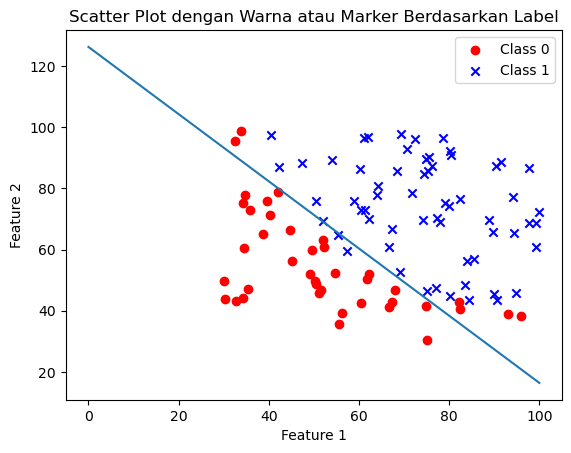

In [98]:
# Menentukan warna atau marker berdasarkan nilai y_train
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', label='Class 0', marker='o')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', label='Class 1', marker='x')
plt.plot(x1, x2)
# Memberikan label dan judul
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot dengan Warna atau Marker Berdasarkan Label')

# Menampilkan legend
plt.legend()

# with regularization